In [956]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

In [957]:
df = pd.read_csv('all_data_R.csv', encoding='cp1251', parse_dates=['age(years)'])
df = df.drop_duplicates(['filename', 'age(years)'])
df.head()

Y      filename  sex  age     age(years)  corpus group  child_TNW  \
0  1  fssli009.cha  NaN  165          13.75  Conti4   SLI        287   
1  1  fssli058.cha  NaN  172  14.3333333333  Conti4   SLI        368   
2  1  fssli062.cha  NaN  160  13.3333333333  Conti4   SLI        266   
3  1  fssli066.cha  NaN  184  15.3333333333  Conti4   SLI        405   
4  1  fssli108.cha  NaN  176  14.6666666667  Conti4   SLI        300   

   child_TNS  examiner_TNW  ...  word_errors       f_k  n_v  n_aux  n_3s_v  \
0         36             4  ...            8  1.210456    0      2       2   
1         42            27  ...           16  1.871708    0      4       0   
2         26             2  ...            0  2.240602    0      1       0   
3         40            21  ...            4  1.877762    1      0       0   
4         35            20  ...            8  0.339524    0      1       1   

   det_n_pl  det_pl_n  pro_aux  pro_3s_v  total_error  
0         7         0        0         1           12  
1         5         0        0         0            9  
2         5         0        0         0            6  
3        11         0        0         0           12  
4         5         0        0         0            7  

[5 rows x 64 columns]

–ù–æ–≤–∞—è —Ç–µ–º–∞: –ø—Ä–æ–≤–æ–¥–∏—Ç—Å—è —Ç–µ—Å—Ç —Å—Ä–µ–¥–∏ –¥–µ—Ç–µ–π —Å –¥–µ—Ñ–µ–∫—Ç–æ–º —Ä–µ—á–∏ –∏ –±–µ–∑ –¥–µ—Ñ–µ–∫—Ç–∞. –í—Å–µ –¥–µ—Ç–∏ –≤–∏–¥—è—Ç –∫–Ω–∏–≥—É –≤–ø–µ—Ä–≤—ã–µ. –°–º–æ—Ç—Ä—è –Ω–∞ –∏–ª–ª—é—Å—Ç—Ä–∞—Ü–∏–∏, –æ–Ω–∏ –¥–æ–ª–∂–Ω—ã –ø–µ—Ä–µ—Å–∫–∞–∑–∞—Ç—å —Å—é–∂–µ—Ç –∫–Ω–∏–≥–∏. –î–µ—Ç—è–º –Ω–∞–¥–æ —Ä–∞—Å—Å–∫–∞–∑—ã–≤–∞—Ç—å –≤ –ø—Ä–æ—à–µ–¥—à–µ–º –≤—Ä–µ–º–µ–Ω–∏. –ï—Å—Ç—å –∏ —ç–∫–∑–∞–º–µ–Ω–∞—Ç–æ—Ä—ã, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–ø—Ä–∞–≤–ª—è—é—Ç –¥–µ—Ç–µ–π. 
__Y__ | 0 - —Ç–∏–ø–∏—á–Ω–æ —Ä–∞–∑–≤–∏–≤–∞—é—â–∏–µ—Å—è –¥–µ—Ç–∏, 1 - –¥–µ—Ç–∏ —Å –Ω–∞—Ä—É—à–µ–Ω–∏—è–º–∏ —Ä–µ—á–∏ 

__child_TNW__ | –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –≤ —Å—Ç–µ–Ω–æ–≥—Ä–∞–º–º–µ 

__child_TNS__ | –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π (–¥–µ—Ç–µ–π —Å SLI, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –≥–æ–≤–æ—Ä—è—Ç –∫–æ—Ä–æ—Ç–∫–∏–º–∏ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è–º–∏)

__group__ | —ç—Ç–æ —Ç–æ –∂–µ —Å–∞–º–æ–µ, —á—Ç–æ –∏ Y, –Ω–æ –ª–µ–≥—á–µ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫ –≤ Python –∏ R 

__examiner_TNW__ | –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤, –ø—Ä–æ–∏–∑–Ω–µ—Å–µ–Ω–Ω—ã—Ö —ç–∫—Å–ø–µ—Ä—Ç–æ–º (–¥–µ—Ç–∏ —Å SLI, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –Ω—É–∂–¥–∞—é—Ç—Å—è –≤ –ø–æ–¥–¥–µ—Ä–∂–∫–µ)

__freq_ttr__ | Frequency of Word Types to Word Token Ratio / –¥–µ–ª–∏—Ç —Ç–∏–ø—ã —Å–ª–æ–≤ –Ω–∞ –º–∞—Ä–∫–µ—Ä—ã —Å–ª–æ–≤ –∏ –æ–±–µ—Å–ø–µ—á–∏–≤–∞–µ—Ç –ø—Ä–∏–±–ª–∏–∑–∏—Ç–µ–ª—å–Ω—É—é –º–µ—Ä—É –ª–µ–∫—Å–∏—á–µ—Å–∫–æ–≥–æ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏—è. 

__r_2_i_verbs__ | —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –Ω–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –∏ —Å–∫–ª–æ–Ω—è–µ–º—ã—Ö –≥–ª–∞–≥–æ–ª–æ–≤ / –¥–µ—Ç–∏ —Å SLI —á–∞—Å—Ç–æ –∏—Å–ø—ã—Ç—ã–≤–∞—é—Ç —Ç—Ä—É–¥–Ω–æ—Å—Ç–∏ —Å –º–æ—Ä—Ñ–µ–º–∞–º–∏ -ed, - s, be –∏ do. –≠—Ç–æ –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é –Ω–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –≥–ª–∞–≥–æ–ª–æ–≤ –≤–º–µ—Å—Ç–æ –∏—Ö —Å–∫–ª–æ–Ω—è–µ–º—ã—Ö —Ñ–æ—Ä–º. 

__mor_words__ | –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –Ω–∞ —É—Ä–æ–≤–Ω–µ %mor 

__num_pos_tags__ | –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Ç–µ–≥–æ–≤ —á–∞—Å—Ç–∏ —Ä–µ—á–∏ 

__n_dos__ | –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–∑, –∫–æ–≥–¥–∞ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è —Å–ª–æ–≤–æ "do" 

__repetition__ | –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–π / –ø–æ–¥—Å—á–∏—Ç—ã–≤–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–π, –ø–æ–º–µ—á–µ–Ω–Ω—ã—Ö –≤ —Ñ–æ—Ä–º–∞—Ç–µ —á–∞—Ç–∞ –≤–Ω—É—Ç—Ä–∏ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã—Ö —Å–∫–æ–±–æ–∫, –Ω–∞–ø—Ä–∏–º–µ—Ä, –º–æ–ª–æ–∫–æ –ú–æ–ª–æ–∫–æ –ú–æ–ª–æ–∫–æ –ú–æ–ª–æ–∫–æ = –ú–æ–ª–æ–∫–æ [x 4] 

__retracing__ | –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–π / –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–µ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è, –∫–æ–≥–¥–∞ –≥–æ–≤–æ—Ä—è—â–∏–π –æ—Ç–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è –æ—Ç –≤—ã—Å–∫–∞–∑—ã–≤–∞–Ω–∏—è, –Ω–æ –∑–∞—Ç–µ–º –ø—Ä–æ–¥–æ–ª–∂–∞–µ—Ç –µ–≥–æ —Å–Ω–æ–≤–∞. 

__fillers__ | –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–ø–æ–ª–Ω–∏—Ç–µ–ª–µ–π / –ø–æ–¥—Å—á–∏—Ç—ã–≤–∞–µ—Ç –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –Ω–∞–ø–æ–ª–Ω–∏—Ç–µ–ª–µ–π. –°–ø–∏—Å–æ–∫ –Ω–∞–ø–æ–ª–Ω–∏—Ç–µ–ª–µ–π –±—ã–ª —Å–æ–∑–¥–∞–Ω –ø—É—Ç–µ–º –ø–æ–∏—Å–∫–∞ –ø–æ –≤—Å–µ–º—É –∫–æ—Ä–ø—É—Å—É (–≤—Å–µ 1038 –æ–±—Ä–∞–∑—Ü–æ–≤) –¥–ª—è –≤—Å–µ—Ö —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω—ã—Ö –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ –Ω–∞–ø–æ–ª–Ω–∏—Ç–µ–ª–µ–π, —Ç–∞–∫–∏—Ö –∫–∞–∫ um, umm, uh, uhh –∏ —Ç. –¥. 

__average_syl__ | —Å—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≥–æ–≤ –≤ —Å–ª–æ–≤–µ 

__mlu_words__ | —Å—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ –ø—Ä–æ–∏–∑–Ω–µ—Å–µ–Ω–∏—è —Å–ª–æ–≤ / —Å–º. https://en.wikipedia.org/wiki/Mean_length_of_utterance 

__mlu_morphemes__ | —Å—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ –ø—Ä–æ–∏–∑–Ω–µ—Å–µ–Ω–∏—è –º–æ—Ä—Ñ–µ–º / —Ç–æ –∂–µ, —á—Ç–æ –∏ –≤—ã—à–µ, –Ω–æ –¥–ª—è –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π –≤–º–µ—Å—Ç–æ —Å–ª–æ–≤ 

__mlu100_utts__ | —Å—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ –ø—Ä–æ–∏–∑–Ω–µ—Å–µ–Ω–∏—è –ø–µ—Ä–≤—ã—Ö 100 —Å–ª–æ–≤ 

__verb_utt__ |  –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã—Å–∫–∞–∑—ã–≤–∞–Ω–∏–π, —Å–æ—Å—Ç–æ—è—â–∏—Ö –∏–∑ –≥–ª–∞–≥–æ–ª–æ–≤ 

__dss__ | –æ—Ü–µ–Ω–∫–∞ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è —Ä–∞–∑–≤–∏—Ç–∏—è /  –º–µ—Ä–∞ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è 

__ipsyn_total__ | –∏–Ω–¥–µ–∫—Å –ø—Ä–æ–¥—É–∫—Ç–∏–≤–Ω–æ–π —Å–∏–Ω—Ç–∞–∫—Å–∏—á–µ—Å–∫–æ–π –æ—Ü–µ–Ω–∫–∏ / –µ—â–µ –æ–¥–∏–Ω –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è

__word_errors__ | –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—à–∏–±–æ–∫ –≤ —Å–ª–æ–≤–∞—Ö 

__f_k__ | —Ñ–ª–µ—à-–ö–∏–Ω–∫–µ–π–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç | —Å–º. https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests 

__n_v__ | —á–∏—Å–ª–æ —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö, –∑–∞ –∫–æ—Ç–æ—Ä—ã–º–∏ —Å—Ä–∞–∑—É —Å–ª–µ–¥—É–µ—Ç –≥–ª–∞–≥–æ–ª 

__n_aux__ | —á–∏—Å–ª–æ —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö, –∑–∞ –∫–æ—Ç–æ—Ä—ã–º–∏ —Å—Ä–∞–∑—É —Å–ª–µ–¥—É–µ—Ç –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–π –≥–ª–∞–≥–æ–ª 

__n_3s_v__ | —á–∏—Å–ª–æ —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö —Ç—Ä–µ—Ç—å–µ–≥–æ –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ —á–∏—Å–ª–∞, –∑–∞ –∫–æ—Ç–æ—Ä—ã–º–∏ —Å—Ä–∞–∑—É —Å–ª–µ–¥—É–µ—Ç –≥–ª–∞–≥–æ–ª

__det_n_pl__ | * –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø—Ä–µ–¥–µ–ª—è—é—â–∏—Ö —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö, –∑–∞ –∫–æ—Ç–æ—Ä—ã–º–∏ —Å–ª–µ–¥—É–µ—Ç –ª–∏—á–Ω–æ–µ –º–µ—Å—Ç–æ–∏–º–µ–Ω–∏–µ* 

__det_pl_n__ | * —á–∏—Å–ª–æ –æ–ø—Ä–µ–¥–µ–ª—è—é—â–∏—Ö –º–µ—Å—Ç–æ–∏–º–µ–Ω–∏–π, –∑–∞ –∫–æ—Ç–æ—Ä—ã–º–∏ —Å–ª–µ–¥—É–µ—Ç —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ–µ 

__pro_aux__ | * –º–µ—Å—Ç–æ–∏–º–µ–Ω–∏—è —Å –ø–æ—Å–ª–µ–¥—É—é—â–∏–º –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–º –≥–ª–∞–≥–æ–ª–æ–º* 
 
__total_error__ | –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –º–æ—Ä—Ñ–æ—Å–∏–Ω—Ç–∞–∫—Å–∏—á–µ—Å–∫–∏—Ö –æ—à–∏–±–æ–∫ 

In [958]:
a = df['child_TNW'].mean()
sigma = df['child_TNW'].std(ddof=1)

n = df['child_TNW'].shape[0]

a, sigma, n

(423.1470335339639, 242.6796402555204, 1163)

In [959]:
def edf(x: float) -> float:
    """–≠–º–ø–∏—Ä–∏—á–µ—Å–∫–∞—è —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–∞ —Å–ª–æ–≤.
    """
    
    samples = df['child_TNW']
    
    return samples[samples < x].shape[0] / samples.shape[0]

In [960]:
cdf = stats.norm(loc=a, scale=sigma).cdf

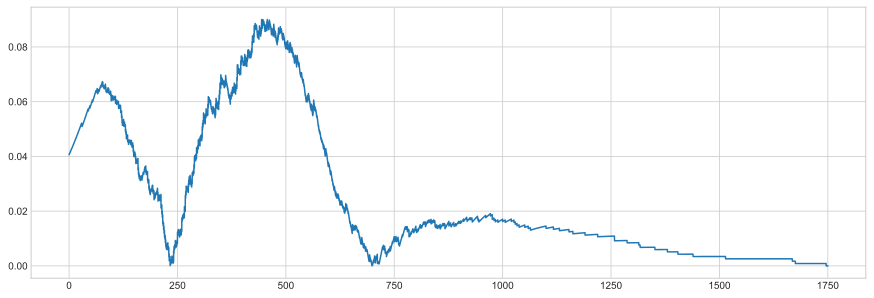

In [961]:
ox = np.linspace(0, 1750, 10000)
oy = np.array([np.abs(edf(x) - cdf(x)) for x in ox])

plt.figure(figsize=(15, 5))
plt.plot(ox, oy)

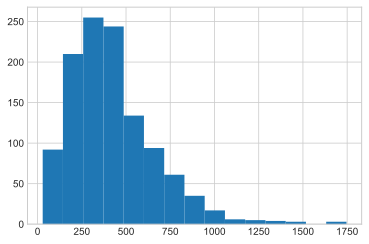

In [962]:
df['child_TNW'].hist(bins=15)

–ú–∞–∫—Å–∏–º—É–º —Ä–∞–∑–Ω–∏—Ü—ã:

In [963]:
x_max = 0
y_max = 0

for x, y in zip(ox, oy):
    if y > y_max:
        x_max = x
        y_max = y
        
x_max, y_max

(457.1457145714572, 0.09003545543238511)

–ó–Ω–∞—á–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞:

In [964]:
D = y_max
D

0.09003545543238511

–ö—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ:

In [965]:
alpha = 0.05

stats.ksone.ppf(1 - alpha, n=n)

0.03574306638452909

–î–ª—è –¥–∞–Ω–Ω–æ–≥–æ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –≥–∏–ø–æ—Ç–µ–∑–∞ –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ä–æ—Å—Ç–∞ —Ö–æ–∫–∫–µ–∏—Å—Ç–æ–≤ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è.

In [966]:
kstest = stats.kstest(rvs=df['child_TNW'], cdf=cdf, alternative='greater')
kstest

KstestResult(statistic=0.09027266705463943, pvalue=5.35035809830964e-09)

In [967]:
stats.ksone.ppf(1 - kstest.pvalue, n=n)

0.09027266707802611

__–ì–∏–ø–æ—Ç–µ–∑–∞ 1__

–ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Å–ª–æ–≤ –≤ –ø–µ—Ä–µ—Å–∫–∞–∑–µ –¥–µ—Ç–µ–π —Å SLD —Ä–∞–≤–Ω–æ 3/4 —Å—Ä–µ–¥–Ω–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–ª–æ–≤ –≤ –ø–µ—Ä–µ—Å–∫–∞–∑–µ –¥–µ—Ç–µ–π –±–µ–∑ –¥–µ—Ñ–µ–∫—Ç–∞ —Ä–µ—á–∏

–î–ª—è —Å–ª—É—á–∞—è –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –º—ã –ø–æ–ª—É—á–∞–µ–º:
$$T = \dfrac{\overline{X} - a}{\sigma_X / \sqrt{n}},$$

–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª:
$$
P \left( 
    \overline{X} - t_{1 - \alpha/2, \: n - 1} \cdot \dfrac{\sigma_X}{\sqrt{n}} 
    \leq a \leq
    \overline{X} + t_{1 - \alpha/2, \: n - 1} \cdot \dfrac{\sigma_X}{\sqrt{n}} 
\right) = p.
$$

$$a=442.5 * 2 / 3 = 295$$

$$T = \dfrac{\overline{X} - 331.8}{\sigma_X / \sqrt{10}},$$


n=267 => 267-1=266 —Å—Ç–µ–ø–µ–Ω–Ω–µ–π —Å–≤–æ–±–æ–¥—ã

$\alpha = 0.01$. –ê –∫–≤–∞–Ω—Ç–∏–ª—å —Ç–æ–≥–¥–∞ –ø–æ–ª—É—á–∞–µ—Ç—Å—è $t_{1 - 0.01/2}$.

In [971]:
alfa=0.01
t = stats.t.ppf(1-alfa/2,df = 266)
t

2.594438075227965

$$\Omega_\alpha = (-\infty;-2.5944)\cup(2.5944;+\infty).$$

In [972]:
n = child_TNW_1.shape[0]
mean = child_TNW_1.mean()
std = child_TNW_1.std(ddof=1)
n, mean, std

(267, 358.0674157303371, 243.354847710496)

In [973]:
T = (mean - 331.8)/(std/np.sqrt(n))
T

1.7637335507131795

In [974]:
(mean - t*std / np.sqrt(n), mean+t*std/np.sqrt(n))

(319.4282553644917, 396.70657609618246)

–∑–Ω–∞—á–µ–Ω–∏–µ –Ω–µ –ø–æ–ø–∞–¥–∞–µ—Ç –≤ –∫—Ä–∏—Ç–∏—á–µ—Å–∫—É—é –æ–±–ª–∞—Å—Ç—å, –∑–Ω–∞—á–∏—Ç –≥–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –æ–ø—Ä–æ–≤–µ—Ä–≥–Ω—É—Ç–∞

__–ì–∏–ø–æ—Ç–µ–∑–∞ 2__

–ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ —á–µ–º –±–æ–ª—å—à–µ —ç–∫—Å–ø–µ—Ä—Ç –ø–æ–ø—Ä–∞–≤–ª—è–µ—Ç —Ä–µ–±—ë–Ω–∫–∞(—á–µ–º –±–æ–ª—å—à–µ —ç–∫—Å–ø–µ—Ä—Ç –≥–æ–≤–æ—Ä–∏—Ç –µ–º—É —Å–ª–æ–≤),—Ç–µ–º –±–æ–ª—å—à–µ —Ä–µ–±—ë–Ω–æ–∫ –¥–æ–ø—É—Å–∫–∞–µ—Ç –æ—à–∏–±–æ–∫, –∏–∑-–∑–∞ —Ç–æ–≥–æ, —á—Ç–æ –Ω–µ—Ä–≤–Ω–∏—á–∞–µ—Ç 

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –æ—Ç–¥–µ–ª—å–Ω–æ —ç—Ç—É –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –¥–ª—è –¥–µ—Ç–µ–π —Å –¥–µ—Ñ–µ–∫—Ç–æ–≤ –∏ –¥–ª—è –¥–µ—Ç–µ–π –±–µ–∑ –¥–µ—Ñ–µ–∫—Ç–∞

–≥–æ–ª—É–±–æ–π - –¥–µ—Ç–∏ —Å –¥–µ—Ñ–µ–∫—Ç–æ–º

–æ—Ä–∞–Ω–¥–∂–µ–≤—ã–π - –±–µ–∑ –¥–µ—Ñ–µ–∫—Ç–∞

Text(0, 0.5, '–∑–∞–º–µ—á–∞–Ω–∏—è —ç–∫—Å–ø–µ—Ä—Ç–∞')

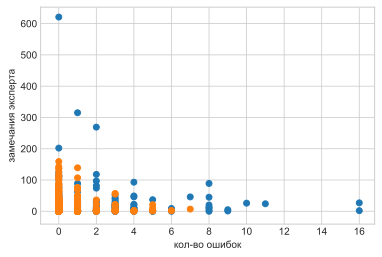

In [975]:
plt.scatter(df.loc[df["Y"]==1,"word_errors"],
           df.loc[df["Y"]==1,"examiner_TNW"])
plt.scatter(df.loc[df["Y"]==0,"word_errors"],
           df.loc[df["Y"]==0,"examiner_TNW"])
plt.xlabel('–∫–æ–ª-–≤–æ –æ—à–∏–±–æ–∫')
plt.ylabel('–∑–∞–º–µ—á–∞–Ω–∏—è —ç–∫—Å–ø–µ—Ä—Ç–∞')

In [976]:
df[['word_errors', 'examiner_TNW']].corr()

word_errors  examiner_TNW
word_errors      1.000000      0.033129
examiner_TNW     0.033129      1.000000

–¢–∞–∫ –∂–µ –ø—Ä–æ–≤–µ—Ä–∏–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —ç—Ç–∏—Ö –¥–≤—É—Ö –≤–µ–ª–∏—á–∏–Ω, –ø–æ—Å—á–∏—Ç–∞–µ–º –Ω–µ—Å–º–µ—â—ë–Ω–Ω—É—é –æ—Ü–µ–Ω–∫—É
$$\sigma_{xy} = \dfrac{1}{n - 1} \displaystyle\sum_{i = 1}^n (x_i - \overline{x}) \cdot (y_i - \overline{y})$$

In [977]:
Error = df.word_errors
Examiner = df["examiner_TNW"]
M_Error = Error.mean()
M_Examiner = Examiner.mean()
cov = ((Error - M_Error)*(Examiner - M_Examiner)).sum() / (Examiner.shape[0]-1)
cov

1.4696242283962038

–£ –Ω–∞—Å –ø–æ–ª—É—á–∏–ª–∞—Å—å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∫–æ–≤–∞—Ä–∏–∞—Ü–∏, —ç—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ —Å–≤—è–∑—å –ø—Ä—è–º–æ–ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–∞. –ù–æ –ø–æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º—ã –º–æ–∂–µ–º —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –æ—á–µ–Ω—å –º–∞–ª–µ–Ω—å–∫–∞—è. –ì–∏–ø–æ—Ç–µ–∑–∞ –æ–ø—Ä–æ–≤–µ—Ä–≥–Ω—É—Ç–∞.

__–ì–∏–ø–æ—Ç–µ–∑–∞ 3__

–ü–æ—Å–º–æ—Ç—Ä–∏–º, –Ω–∞ —Å–∫–æ–ª—å–∫–æ —Å–≤—è–∑–∞–Ω—ã –∫–æ–ª-–≤–æ —Å–ª–æ–≤ –ø–∞—Ä–∞–∑–∏—Ç–æ–≤ –∏ –∏ –∫–æ–ª-–≤–æ –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–π

In [978]:
df[['fillers', 'repetition']].corr()

fillers  repetition
fillers     1.000000    0.299435
repetition  0.299435    1.000000

In [979]:
Fillers = df.fillers
Repetition = df["repetition"]
M_Fillers = Error.mean()
M_Repetition = Repetition.mean()
cov = ((Fillers - M_Fillers)*(Repetition - M_Repetition)).sum() / (Repetition.shape[0]-1)
cov

34.56464008595492

–°–≤—è–∑—å –µ—Å—Ç—å, –Ω–æ –Ω–µ –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–∞—è, —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:

In [980]:
x1 = df["fillers"]
y1 = df["repetition"]

In [981]:
x1 = df["fillers"]
y1 = df["mlu100_utts"]

In [982]:
b1 = ((x1 * y1).mean() - x1.mean() * y1.mean()) / ((x1 ** 2).mean() - x1.mean() ** 2)
b1

0.5219593221306821

In [983]:
b0 = y1.mean() - b1 * x1.mean()
b0

44.1723650750297

–ú–æ–¥–µ–ª—å –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏–º–µ–µ—Ç –≤–∏–¥:
$$ùë¶=44.1723+0.52‚ãÖùë•$$

Text(0, 0.5, '–∫–æ–ª-–≤–æ –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–π')

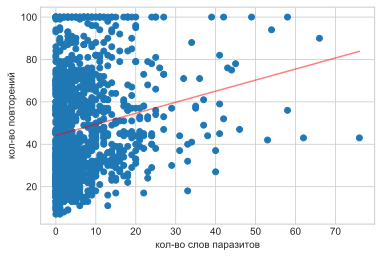

In [1022]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('–∫–æ–ª-–≤–æ —Å–ª–æ–≤ –ø–∞—Ä–∞–∑–∏—Ç–æ–≤')
plt.ylabel('–∫–æ–ª-–≤–æ –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–π')

__–ì–∏–ø–æ—Ç–µ–∑–∞ 4__

–ü—Ä–µ–¥—Å–∫–∞–∂–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –æ–ø–∏—Ä–∞—è—Å—å –Ω–∞ —Å—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –ø—Ä–æ–∏–∑–Ω–µ—Å–µ–Ω–∏—è –ø–µ—Ä–≤—ã—Ö 100 —Å–ª–æ–≤ –∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è

In [985]:
x2 = df[['ipsyn_total', 'mlu100_utts']].values

y2 = df['child_TNW'].values.reshape(-1, 1)
y2

array([[287],
       [368],
       [266],
       ...,
       [337],
       [511],
       [495]], dtype=int64)

In [986]:
x2.shape

(1163, 2)

In [987]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))

In [988]:
x2.shape

(1163, 3)

In [989]:
x2

array([[ 1., 60., 35.],
       [ 1., 62., 40.],
       [ 1., 64., 25.],
       ...,
       [ 1., 78., 28.],
       [ 1., 89., 44.],
       [ 1., 86., 50.]])

In [990]:
XTX = x2.T.dot(x2)

np.linalg.det(XTX)

102960486626127.55

In [991]:
XTX

array([[1.163000e+03, 8.706900e+04, 5.564000e+04],
       [8.706900e+04, 6.841819e+06, 4.531084e+06],
       [5.564000e+04, 4.531084e+06, 3.349016e+06]])

In [992]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print(b)

[[-206.55020125]
 [   4.06431746]
 [   6.80197389]]


–ò—Ç–∞–∫, –Ω–∞—à–∞ –º–æ–¥–µ–ª—å —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏–º–µ–µ—Ç –≤–∏–¥:
$$y = 7.9404 - 1.0559 \cdot x_1 + 0.3556 \cdot x_2,$$
–≥–¥–µ $x_1$ ‚Äî —É—Ä–æ–≤–µ–Ω—å —è–∑—ã–∫–∞, $x_2$ ‚Äî –≤—Ä–µ–º—è –ø—Ä–æ–∏–∑–Ω–µ—Å–µ–Ω–∏—è –ø–µ—Ä–≤—ã—Ö 100 —Å–ª–æ–≤.


In [993]:
z2 = x2.dot(b)

print(f'real: {y2[:6].T}')
print(f'pred: {z2[:6].T}')

real: [[287 368 266 405 300 224]]
pred: [[275.37793242 317.51643679 223.61546335 354.09529392 250.99202767
  227.84844957]]


In [994]:
R1 = z2.var() / y2.var()
R1

0.8379174454178387

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏, —Ä–∞–≤–Ω—ã–π $0.8379$, –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ $84 \%$ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π $y$ _—É—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è_ –∏–ª–∏ _–æ–±—ä—è—Å–Ω—è–µ—Ç—Å—è_ –º–æ–¥–µ–ª—å—é. –û—Å—Ç–∞–≤—à–∏–µ—Å—è $16 \%$ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω—ã –∫–∞–∫–∏–º–∏-—Ç–æ –µ—â—ë —Ñ–∞–∫—Ç–æ—Ä–∞–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–¥–µ–ª—å –Ω–µ —É—á–ª–∞.

–ü–æ—Å—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω—é—é –æ—à–∏–±–∫—É –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏

In [995]:
def mean_approximation_error(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    """–°—Ä–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏.
    """
    
    return np.abs((y_real - y_pred) / y_real).mean()

In [996]:
mean_approximation_error(y2, z2)

0.17279125475585239

–î–ª—è –ø–µ—Ä–≤–æ–≥–æ –ø—Ä–∏–º–µ—Ä–∞ –∏–º–µ–µ–º $k_1 = 2$, $k_2 = 1163 - 2 - 1 = 1160$. –ü–æ—Å—á–∏—Ç–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ $T$:

In [997]:
k1 = 2
k2 = 1160

T1 = (R1 / (1 - R1)) * (k2 / k1)
T1

2998.4233626820846

In [998]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.003482172639214

–ò–º–µ–µ–º $T > F_{crit}$, –ø–æ—ç—Ç–æ–º—É —É—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ.

–ü—Ä–µ–¥—Å–∫–∞–∂–µ–º —Ç–∏–ø —Ä–µ–±—ë–Ω–∫–∞, –æ–ø–∏—Ä–∞—è—Å—å –Ω–∞ —Å—É–º–º–∞—Ä–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –∏ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –≥–ª–∞–≥–æ–ª–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ —Ä–µ–±—ë–Ω–æ–∫ –Ω–µ –ø—Ä–æ—Å–∫–ª–æ–Ω—è–ª –∏ –ø—Ä–æ—Å–∫–ª–æ–Ω—è–ª–æ–∫

In [1040]:
Y = df["Y"]
TNW = df[['child_TNW','r_2_i_verbs']].values

Text(0, 0.5, '—Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –Ω–µ—Å–∫–ª–æ–Ω—è–µ–º—ã—Ö –∏ —Å–∫–ª–æ–Ω—è–µ–º—ã—Ö –≥–ª–∞–≥–æ–ª–æ–≤')

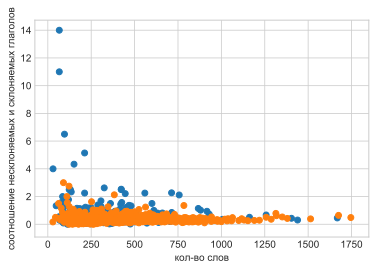

In [1041]:
plt.scatter(df.loc[df["Y"]==1,"child_TNW"],
           df.loc[df["Y"]==1,"r_2_i_verbs"])
plt.scatter(df.loc[df["Y"]==0,"child_TNW"],
           df.loc[df["Y"]==0,"r_2_i_verbs"])
plt.xlabel('–∫–æ–ª-–≤–æ —Å–ª–æ–≤')
plt.ylabel('—Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –Ω–µ—Å–∫–ª–æ–Ω—è–µ–º—ã—Ö –∏ —Å–∫–ª–æ–Ω—è–µ–º—ã—Ö –≥–ª–∞–≥–æ–ª–æ–≤')

–ü–æ—Å—Ç—Ä–æ–∏–º –¥–ª—è –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–∏ –º–æ–¥–µ–ª—å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –º–µ—Ç–æ–¥–æ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞.

–î–æ–±–∞–≤–∏–º —Å—Ç–æ–ª–±–µ—Ü ¬´—Ñ–∏–∫—Ç–∏–≤–Ω–æ–≥–æ¬ª —Ñ–∞–∫—Ç–æ—Ä–∞:

In [1042]:
ones = np.ones((TNW.shape[0], 1))
TNW = np.hstack((ones, TNW))
TNW

array([[  1., 287.,   8.],
       [  1., 368.,  16.],
       [  1., 266.,   0.],
       ...,
       [  1., 337.,   0.],
       [  1., 511.,   0.],
       [  1., 495.,   0.]])

–ù–∞–º –ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è –º–µ—Ç—Ä–∏–∫–∞ —á—Ç–æ–±—ã –≤—ã—á–∏—Å–ª—è—Ç—å —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É —Å–æ—Å–µ–¥–Ω–∏–º–∏ –≤–µ–∫—Ç–æ—Ä–∞–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤. –ë—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –µ–≤–∫–ª–∏–¥–æ–≤–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ.

In [1043]:
from scipy.spatial.distance import euclidean

–ù–∞—á–∞–ª—å–Ω–æ–µ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ $b^{[0]}$ –º–æ–∂–Ω–æ –≤—ã–±–∏—Ä–∞—Ç—å –Ω—É–ª–µ–≤—ã–º –∏–ª–∏ –ø—Ä–æ–∏–∑–≤–æ–ª—å–Ω—ã–º. –ë—É–¥–µ–º —Ç–∞–∫–∂–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç $\lambda_n = \dfrac{0.1}{n}$.

In [1044]:
def sigmoid(x: float) -> float:
    """–°–∏–≥–º–æ–∏–¥–∞.
    """
    
    return 1 / (1 + np.exp(-x))

In [1045]:
def partial_derivative(j: int, b: np.ndarray, x: np.ndarray, y: np.ndarray) -> float:
    """–ß–∞—Å—Ç–Ω–∞—è –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª–∞ Q –ø–æ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π b_j.
    """
    
    return -sum(
        x[i, j] * y[i] * (1 - sigmoid(b.dot(x[i]) * y[i]))
        for i in range(x.shape[0])
    )

In [1046]:
def gradient(b: np.ndarray, x: np.ndarray, y: np.ndarray) -> np.ndarray:
    """–í–µ–∫—Ç–æ—Ä –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞.
    """
    
    return np.array([
        partial_derivative(j, b, x, y)
        for j in range(b.shape[0])
    ])

In [1047]:
def gradient_descent_step(
        lambda_: float,
        b: np.ndarray,
        x: np.ndarray,
        y: np.ndarray,
) -> np.ndarray:
    """–û–¥–∏–Ω —à–∞–≥ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞.
    """
    
    return b - lambda_ * gradient(b, x, y)

In [1048]:
b_0 = np.zeros(TNW.shape[1])

b = b_0

for i in range(1, 10 ** 6):
    lambda_ = 0.1 / i
    
    b_new = gradient_descent_step(lambda_, b, TNW, Y)
        
    if euclidean(b, b_new) < 10 ** (-5):
        print(f'success on step {i}\n')
        
        break
    
    b = b_new

b = b_new.reshape(-1, 1)

print(b)

success on step 2

[[  13.35]
 [4780.2 ]
 [  18.7 ]]


In [1049]:
from sklearn.linear_model import LogisticRegression

In [1050]:
model = LogisticRegression(solver='liblinear')

model.fit(TNW, Y)
b_ = model.coef_.flatten()

model.coef_, model.n_iter_

(array([[-0.48654817, -0.00140379,  0.49942931]]), array([11], dtype=int32))

–î–ª—è –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø–æ–ª—É—á–∞–µ–º –≤–µ–∫—Ç–æ—Ä –∏–∑ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π $z = \sigma(X \cdot b)$.

In [1051]:
z = TNW.dot(b)

z = np.array([sigmoid(z_i) for z_i in z])

print(z)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [1052]:
Y = np.array(df.Y)
Y_pred = np.array([
    1 if z_ == 1 else 0
    for z_ in z
])
print(f'y_real: {Y}')
print(f'y_pred: {Y_pred}')

y_real: [1 1 1 ... 0 0 0]
y_pred: [1 1 1 ... 1 1 1]


–ü–æ–ø—Ä–æ–±—É–µ–º –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª, –∫–æ—Ç–æ—Ä—ã–π –º—ã –ø—ã—Ç–∞–µ–º—Å—è –º–∏–Ω–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å. –ü–æ—Å–∫–æ–ª—å–∫—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –≤ –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ —Ç—Ä–∏, –±—É–¥–µ–º —Ä–∏—Å–æ–≤–∞—Ç—å —ç—Ç–æ—Ç —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª –≤ —Ä–∞–∑—Ä–µ–∑–µ –ø–æ –ø–µ—Ä–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (—Ç.–µ. –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π $b_0$ –±—É–¥–µ–º —Ä–∏—Å–æ–≤–∞—Ç—å –¥–≤—É–º–µ—Ä–Ω—É—é –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç—å –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö $b_1$, $b_2$).

In [1053]:
%config InlineBackend.figure_formats = ['svg'] # –¥–ª—è –æ—Ç—Ä–∏—Å–æ–≤–∫–∏ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –≤ –≤–µ–∫—Ç–æ—Ä–Ω–æ–º —Ñ–æ—Ä–º–∞—Ç–µ

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [1054]:
Y_T = Y.reshape(-1, 1)  # –Ω–∞–º –ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è –∏–º–µ–Ω–Ω–æ —Å—Ç–æ–ª–±–µ—Ü

def functional(b0: float, b1: float, b2: float) -> float:
    """–ú–∏–Ω–∏–º–∏–∑–∏—Ä—É–µ–º—ã–π —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª –¥–ª—è –ø—Ä–∏–º–µ—Ä–∞ 3.
    """
    b = np.array([b0, b1, b2]).reshape(-1, 1)
    
    return (np.log(1 + np.exp(-TNW.dot(b) * Y_T))).sum()

In [ ]:
n_axes = 4
b0_options = [-100, -50, -10, b[0][0]]

fig, axes = plt.subplots(ncols=n_axes, nrows=1, subplot_kw={'projection': '3d'})
fig.set_size_inches(15, 3)

for ax, b0 in zip(axes, b0_options):
    foo = lambda b1, b2: functional(b0=b0, b1=b1, b2=b2)

    X1 = np.linspace(-10, 10, 100)
    Y1 = np.linspace(-10, 10, 100)

    Z = np.array([
        [
            foo(x_, y_)
            for y_ in Y1
        ]
        for x_ in X1
    ])
    
    X1, Y1 = np.meshgrid(X, Y1)
    
    ax.plot_surface(X1, Y1, Z)

    ax.set_xlabel('b1')
    ax.set_ylabel('b2')
    ax.set_zlabel('Z')
    
    Z_min = Z.min()
    where = np.where(Z == Z_min)
    X1_min = round(X1[where][0], 2)
    Y1_min = round(Y1[where][0], 2)
    Z_min = round(Z_min, 2)
    
    ax.set_title(f'b0 = {round(b0, 2)}\nz_min = {Z_min} –≤ —Ç–æ—á–∫–µ ({X1_min}, {Y1_min})')

    ax.view_init(0, -12)

In [1055]:
functional(*b), functional(*b_)

(621.059873781711, 890.0485618126224)